# Example: PCA visualization with cello

This example shows how to visualize PCA results using the celloplot, a violin-style representation where each component is shaped by its score distribution and can be colored by any accompanying feature.

We use the classic Iris dataset as an illustration. The PCA is computed manually using NumPy to make each step transparent:

The data are centered and decomposed into eigenvalues and eigenvectors.

The scores S represent how strongly each component contributes to each sample.

The reconstruction error E expresses the information lost when approximating the data by a limited number of components.

The celloplot (cello) visualizes the score distributions per component, optionally colored by an external variable (here, the species labels).

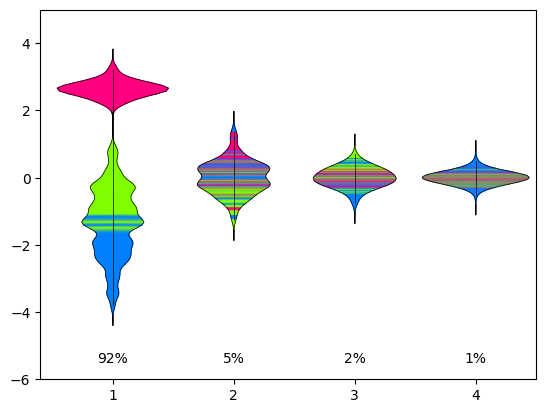

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from cello import cello

# Load the data
iris = load_iris()
X = iris['data']

# Perform PCA
X -= X.mean(axis=0)
vals, vecs = np.linalg.eigh(np.cov(X.T))
total = vals.sum()
# These are the scores representing how much 
# each component contributes to each sample
S = X @ vecs[:, ::-1]
# This is the reconstruction error, which is 
# the information missing from each sample in
# the given cumulative subspace.
E = np.clip(((X**2).cumsum(axis=1) - (S**2).cumsum(axis=1)), 0, None) ** 0.5

# For the iris dataset the colors are set for the flower types
colors = np.repeat(((1,0,0.5),(0.5,1,0),(0,0.5,1)), 50, axis=0)

#cello(E.T, colors, bw=0.01, cbw=0.001, scale=1, side='right')
cello(S.T, colors, bw=0.2, cbw=0.01, side='both')
plt.xlim(( 0.4, 4.5))
plt.ylim((-6, 5))
plt.gca().set_xticks(np.arange(4) + 1)
for idx, val in enumerate(vals[::-1], 1):
    plt.text(idx, S.min() - 1.7, f'{val / total:.0%}', horizontalalignment='center')
plt.show()

This produces a celloplot where each “violin” represents a principal component, and its width indicates the density of sample scores. The colors highlight how the three iris species differ along each component. The percentages below each violin indicate the explained variance.
